# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan.

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

We were encouraged to find datasets outside of those provided throughout the program. With this in mind I chose the "Diabetes Health Dataset" from Kaggle. Here is a link to it. https://www.kaggle.com/datasets/rabieelkharoua/diabetes-health-dataset-analysis?resource=download. This dataset consists of data for 1,879 patients, uniquely identified with IDs ranging from 6000 to 7878. The data includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# I did this project in Gogle Colab because I am using a dataset not included in the four
# provided for us in Codio.
# I uploaded my dataset (provided along with the upload of this notebook) inside of files.
# Please contact me if you have trouble with figuring out how to configure
# the dataset relative to this notebook!

# File names of the four data sets
# adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
# airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
# WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
# bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

import os
# os.getcwd()
# os.listdir()
diabetes_data_filename = os.path.join(os.getcwd(), "diabetes_data.csv")

df = pd.read_csv(diabetes_data_filename, header=0)

df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen to work with a dataset from Kaggle called [diabetes_data](https://www.kaggle.com/datasets/rabieelkharoua/diabetes-health-dataset-analysis?resource=download). This dataset consists of comprehensive health data for 1,879 patients, uniquely identified with IDs ranging from 6000 to 7878. The data includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

I will be predicting diabetes status, which is present in the dataset under the name `Diagnosis`, with a 1 corresponding to `Yes` (the patient has diabetes) and a 0 corresponding to `No` (the patient does not have diabetes. With this in mind, 'Diagnosis` will be the label I use.

This is a supervised learning problem, as I have a specific trait I am trying to predict and have labeled data for. It is a classification problem because there is a limited number of possible classifications I want my model to output either a 0 or a 1 for the `Diagnosis` label, and is specifically a binary classification problem because there are two possiblities for what can be output.

I am expecting to cut down on features after conducting exploratory analysis, and there are some features I am already quite confident I will be excluding. These include `DoctorInCharge`, as there is only one value found here, which is `Confidential`, and therefore it will not have any predictive power. In addition, I am currently expecting that I will not use `AntidiabeticMedications`, a feature that is defined as `Use of antidiabetic medications, where 0 indicates No and 1 indicates Yes`. I am expecting that I will not use this as a feature because I believe that doing so may introduce a circular logic to the model, as the use of antidiabetic medications seems to me to imply that the patient has already been diagnosed with diabetes. I believe including this would introduce data leakage, as this feature directly correlates to the diagnosis of diabetes. In a real world scenerio, I don't believe that predicting diabetes status based on whether a patient is already receiving treatment for diabetes is useful. I am also thinking through what I will do with `Ethnicity` as a feature, because I feel as though using it may serve to reinforce biases encoded in the data, which would be especially bad since this sort of model could be used to make decisions that impact patients. In addition, I feel that race would be helpful in this case through serving as a proxy for other factors, but we have features for social, environmental, and genetic factors included, so I feel like it is not needed.  

With this in mind, features that I am currently open to using are: age, gender, ethnicity, socioeconomicStatus educationLevel, BMI, smoking, alcoholConsumption physicalActivity, dietQuality, sleepQuality, familyHistoryDiabetes, gestationalDiabetes polycysticOvarySyndrome, previousPreDiabetes, hypertension, systolicBP, diastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg, fastingBloodSugar, hbA1c, serumCreatinine, bUNLevels, cholesterolTotal cholesterolLDL, cholesterolHDL, cholesterolTriglycerides antihypertensiveMedications, statins, frequentUrination,excessiveThirst, enexplainedWeightLoss, fatigueLevels,
blurredVision, slowHealingSores, tinglingHandsFeet, qualityOfLifeScore, heavyMetalsExposure, occupationalExposureChemicals, waterQuality, medicalCheckupsFrequency, medicationAdherence, healthLiteracy. I am not expecting to use all of these features, and will likely choose to get rid of additional ones besides the ones I have already pointed out as potentially problematic.

I think this is an important problem because of the human impact it has. Being able to predict diabetes status includes healthcare cost reduction through early identification of patients at risk of developing diabetes (or who already have it but have not yet been diagnosed) leading to improved patient outcomes. Being able to preemptively diagnose diabetes creates value through prioritizing high-risk patients. Insurance companies could also use such a model, designing more accurate pricing models. In this latter case however, the information the model uses would have to be limited, to preserve patient privacy and limit bias.  

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?


3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

False
PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryDiabetes              int64
GestationalDiabetes                int64
PolycysticOvarySyndrome            int64
PreviousPreDiabetes                int64
Hypertension                       int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
CholesterolTotal                 float64
CholesterolLDL                   float64
CholesterolHDL                   float64
Cholestero

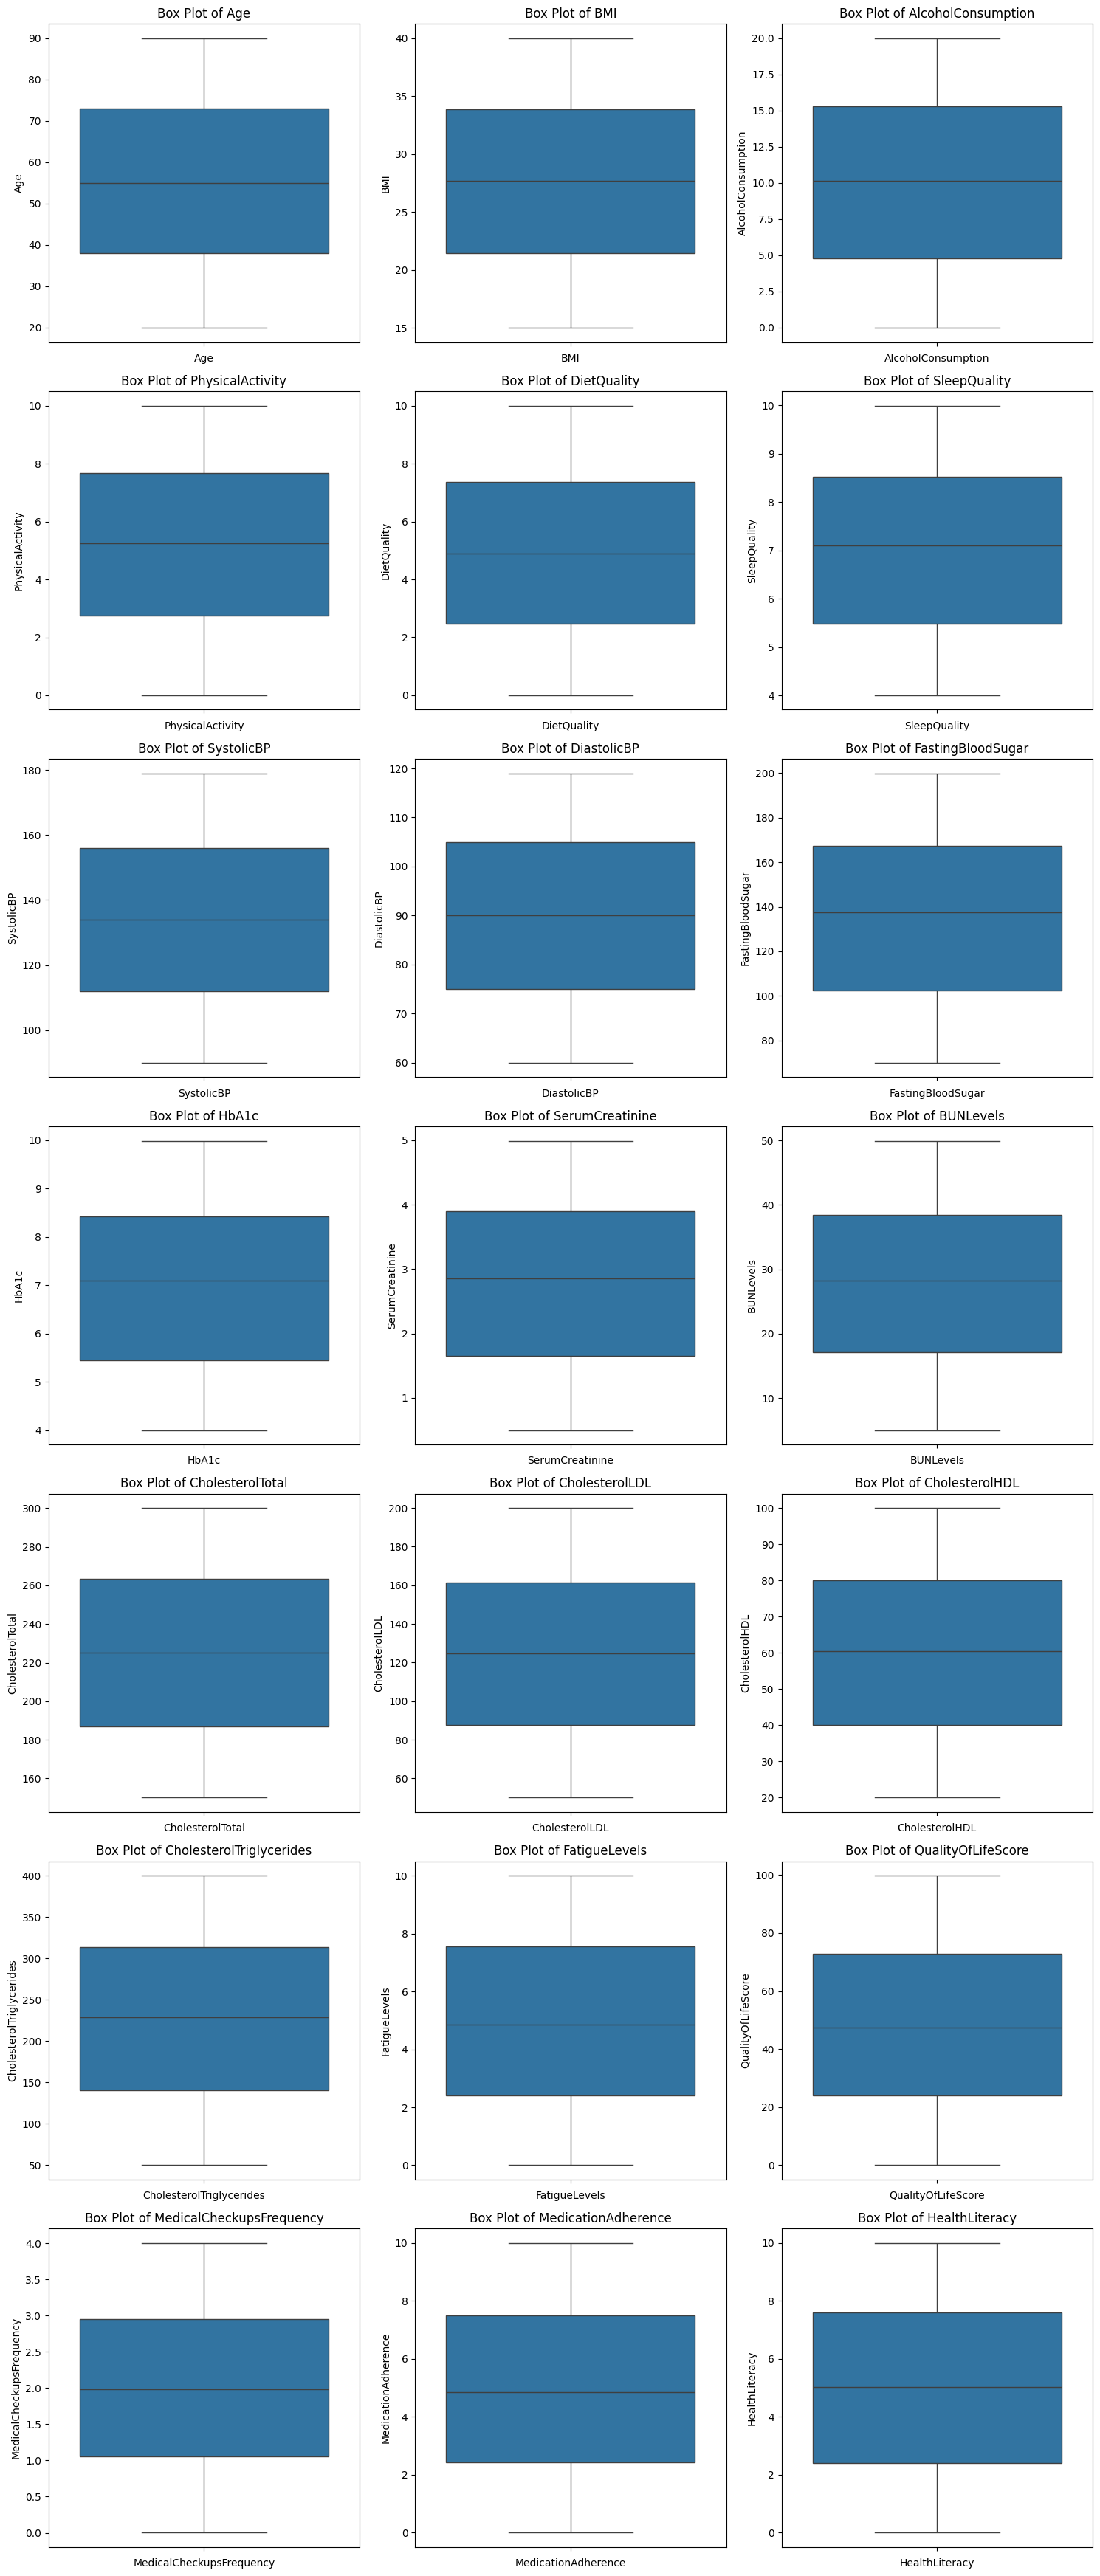

                Age       Gender          BMI      Smoking  \
count   1879.000000  1879.000000  1879.000000  1879.000000   
unique          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN   
mean      55.043108     0.487493    27.687601     0.281533   
std       20.515839     0.499977     7.190975     0.449866   
min       20.000000     0.000000    15.025898     0.000000   
25%       38.000000     0.000000    21.469981     0.000000   
50%       55.000000     0.000000    27.722988     0.000000   
75%       73.000000     1.000000    33.856460     1.000000   
max       90.000000     1.000000    39.998811     1.000000   

        AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
count          1879.000000       1879.000000  1879.000000   1879.000000   
unique                 NaN               NaN          NaN           NaN   
top                    NaN    

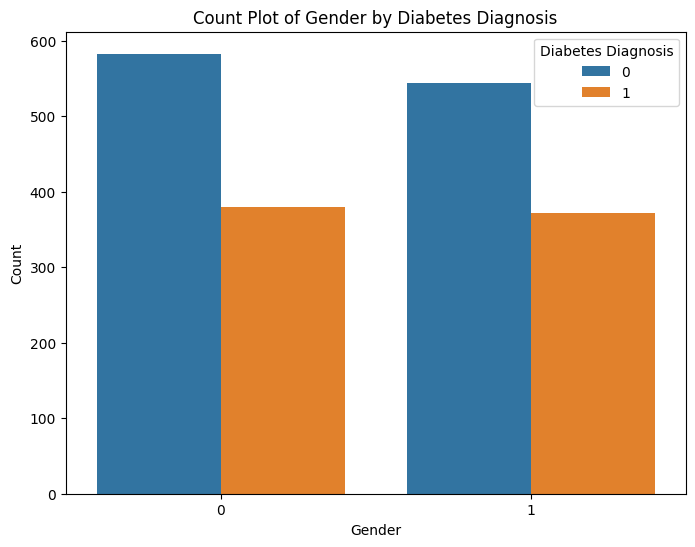

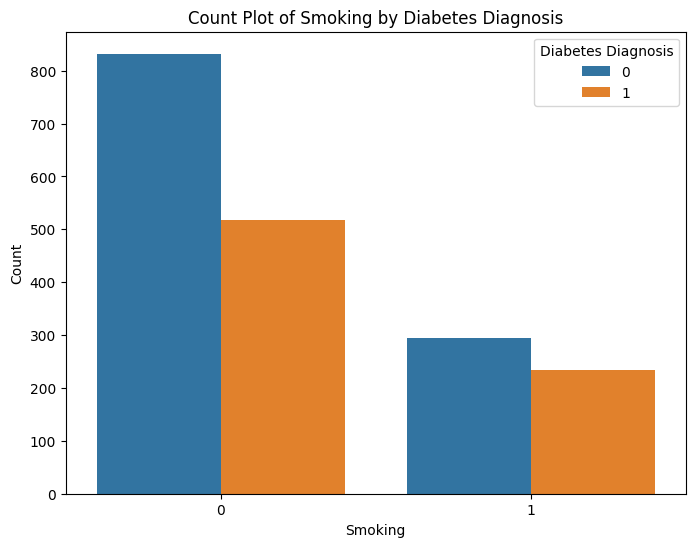

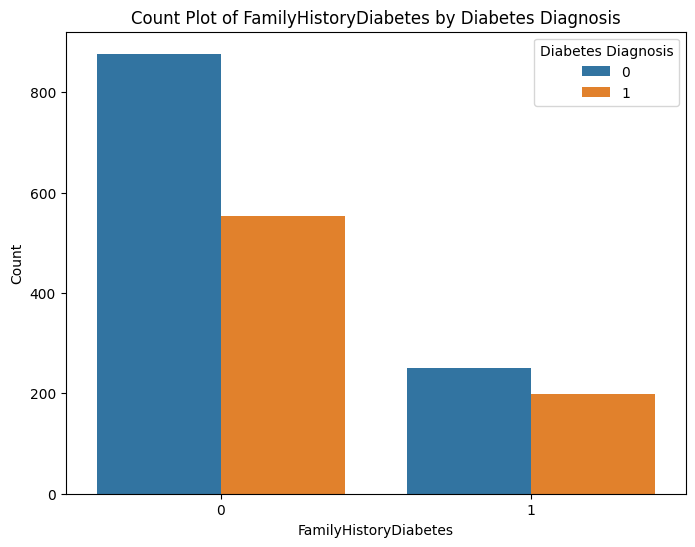

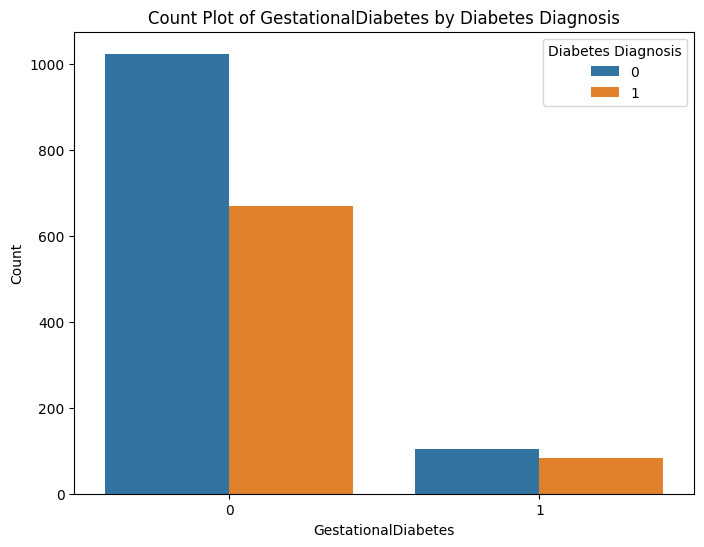

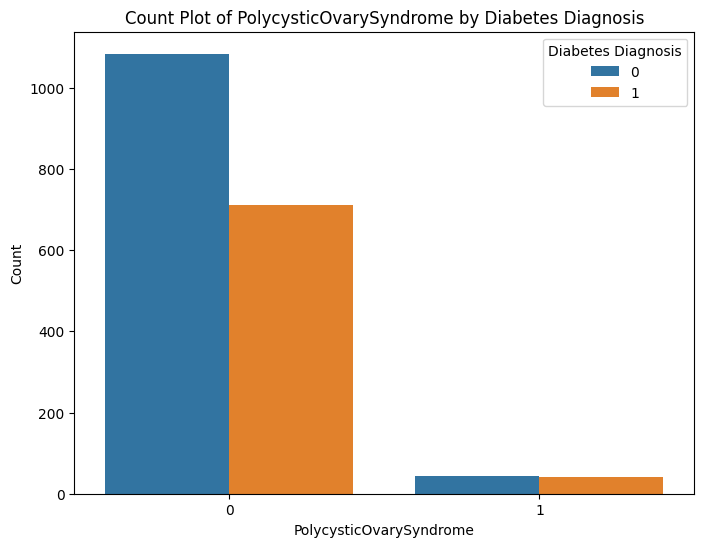

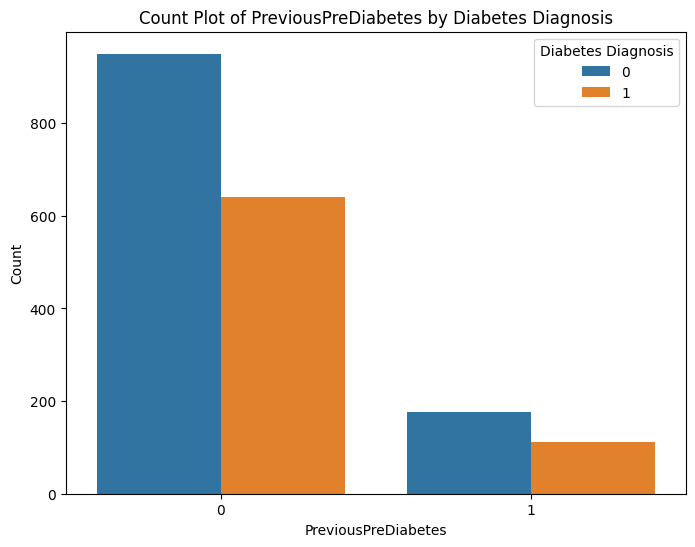

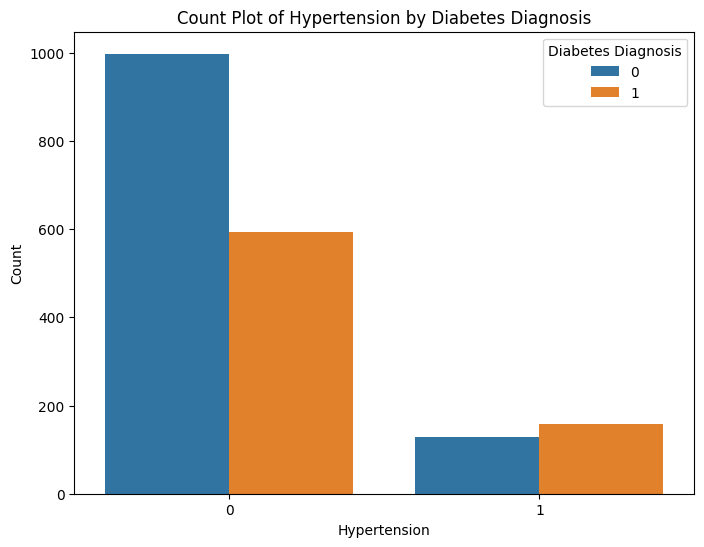

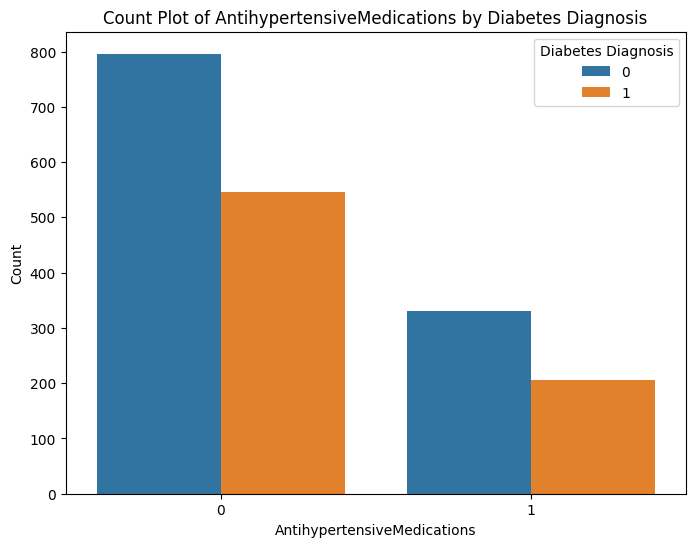

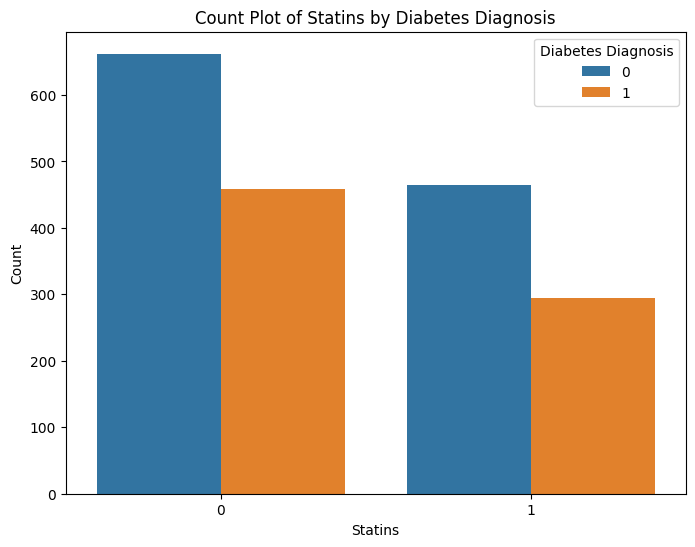

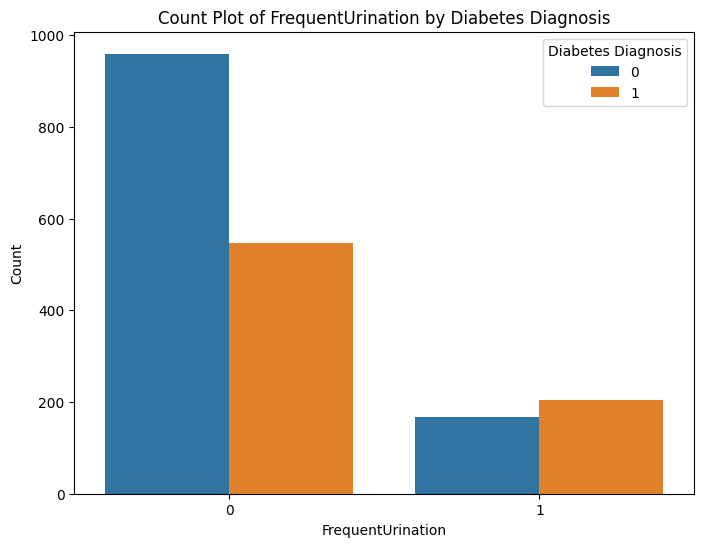

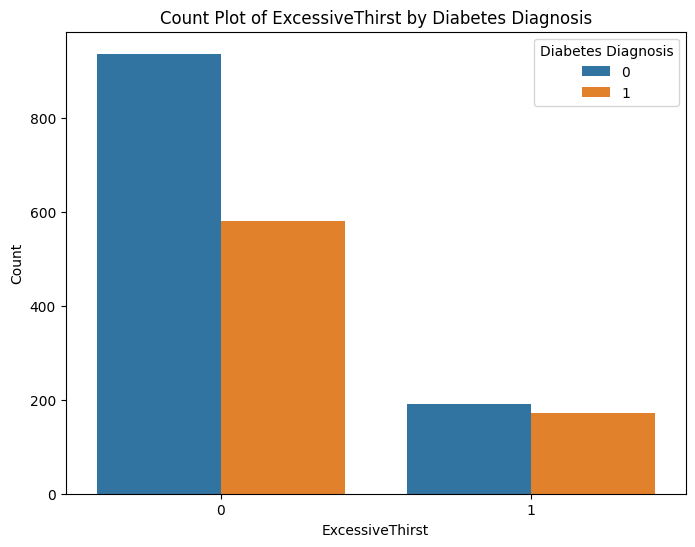

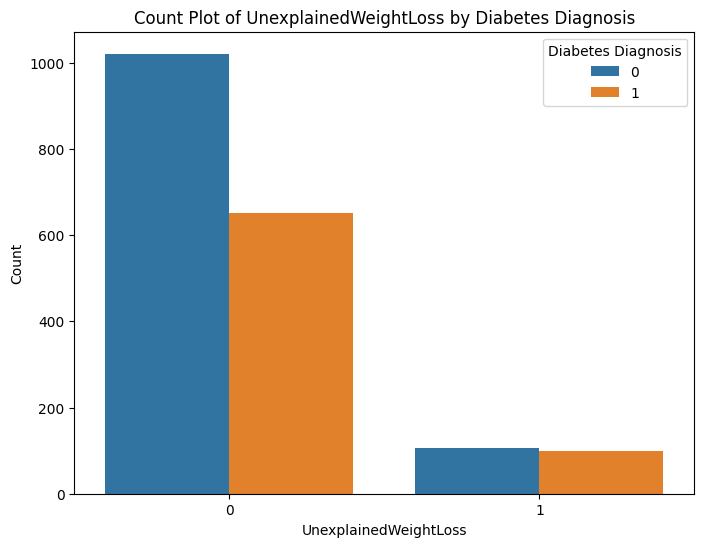

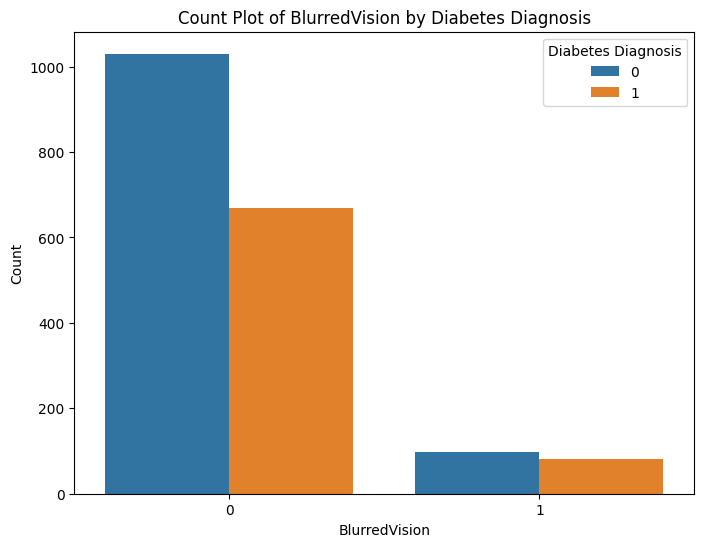

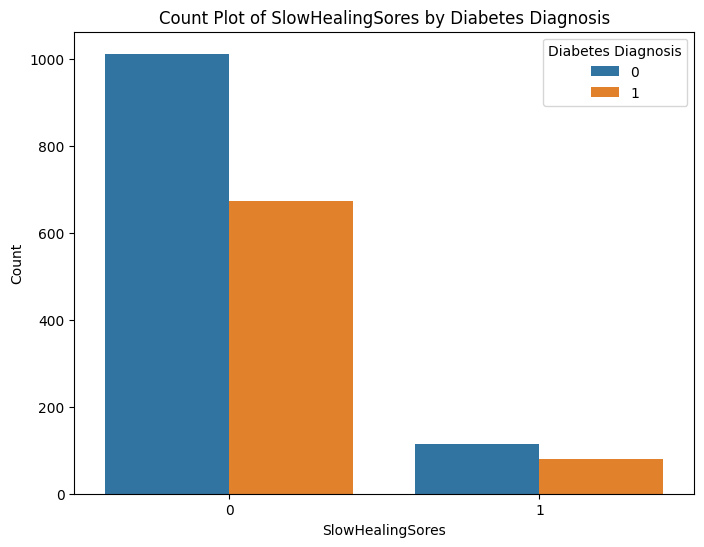

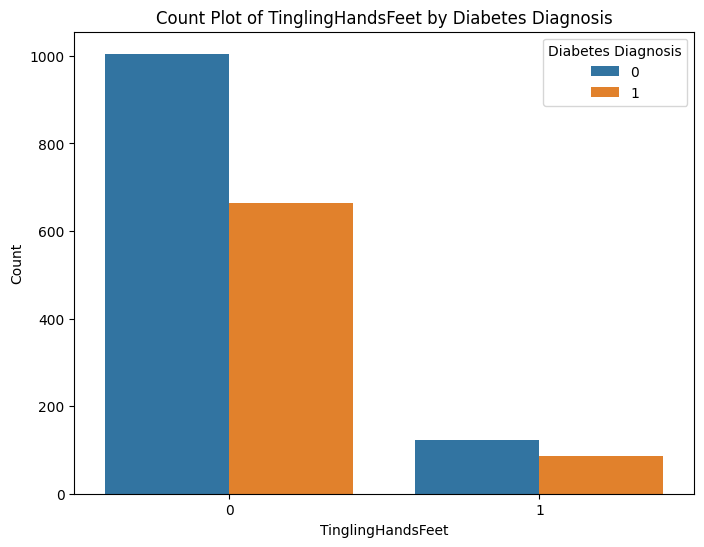

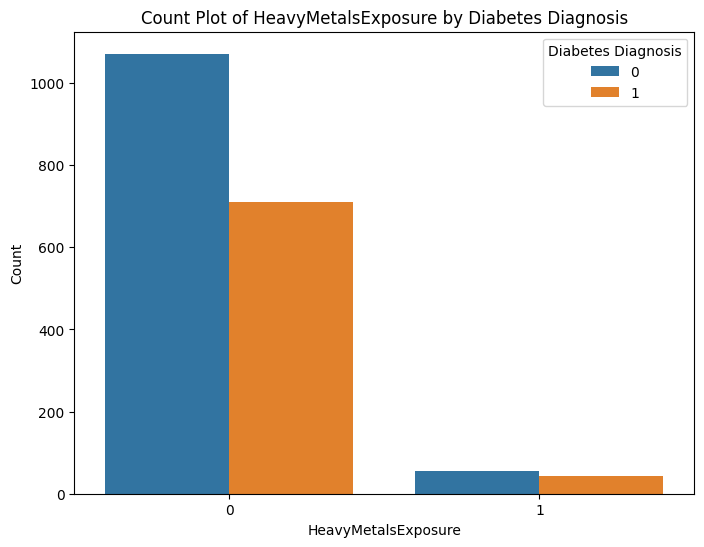

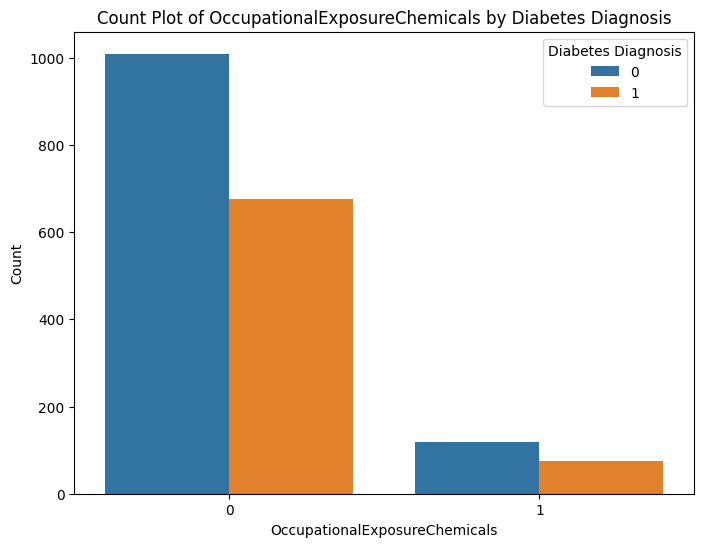

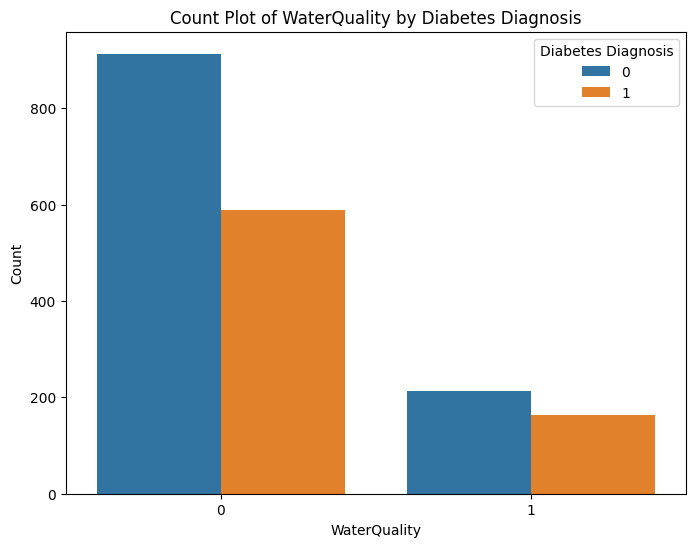

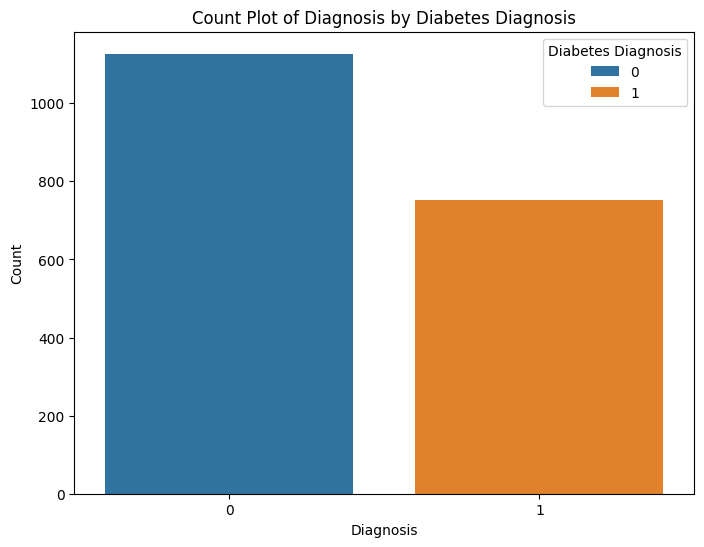

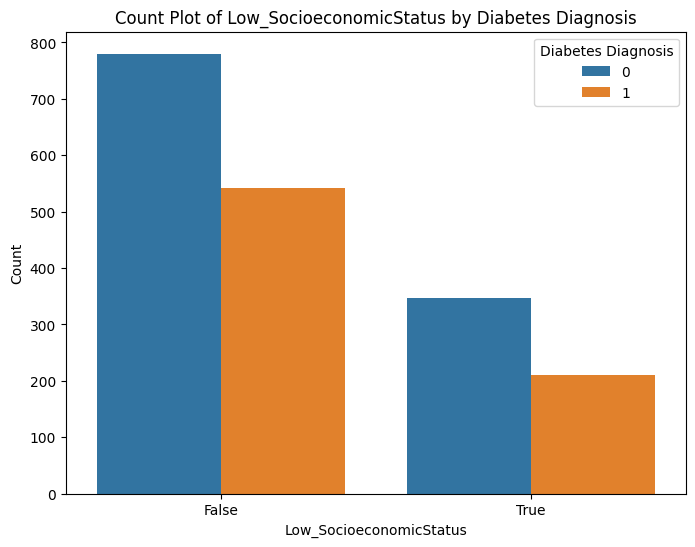

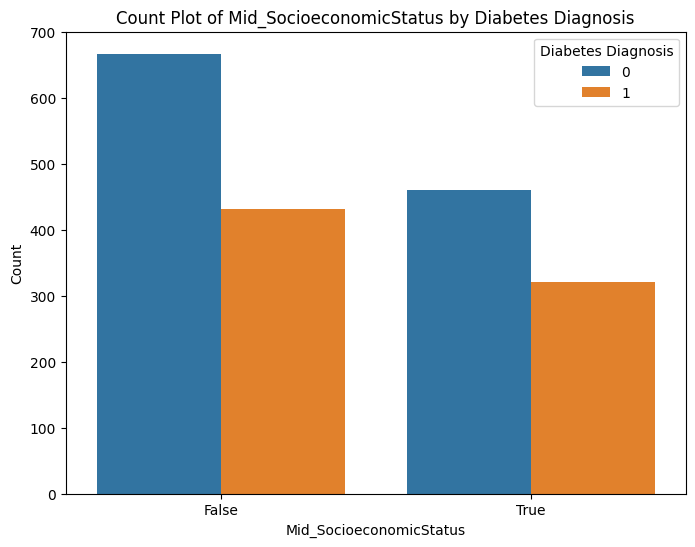

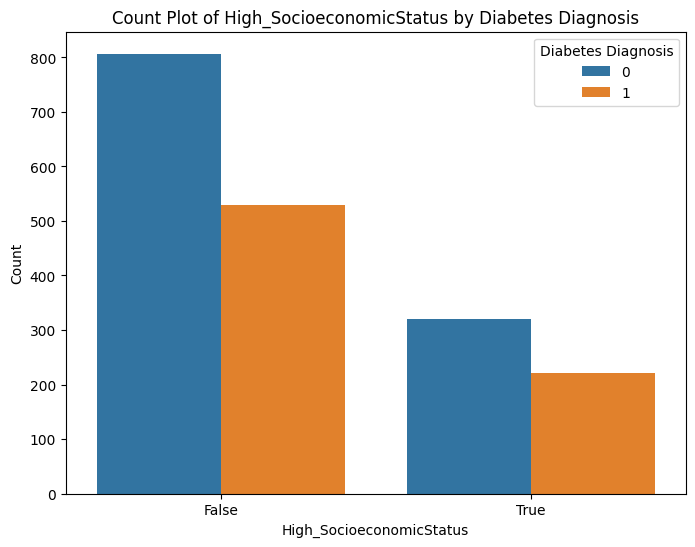

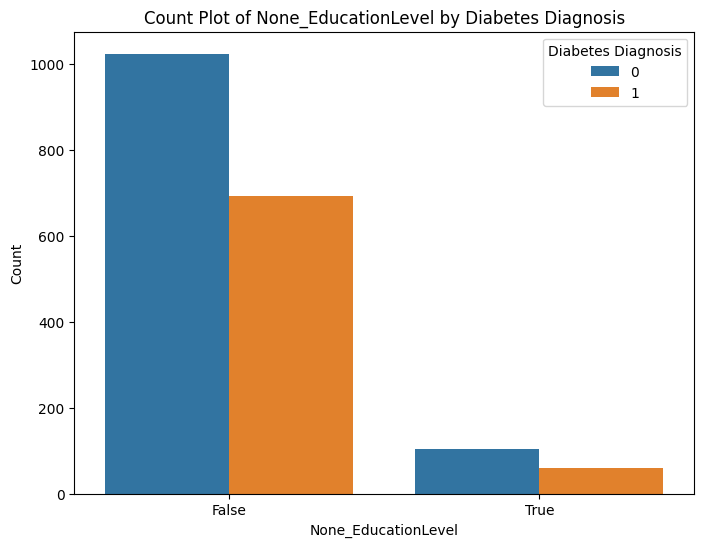

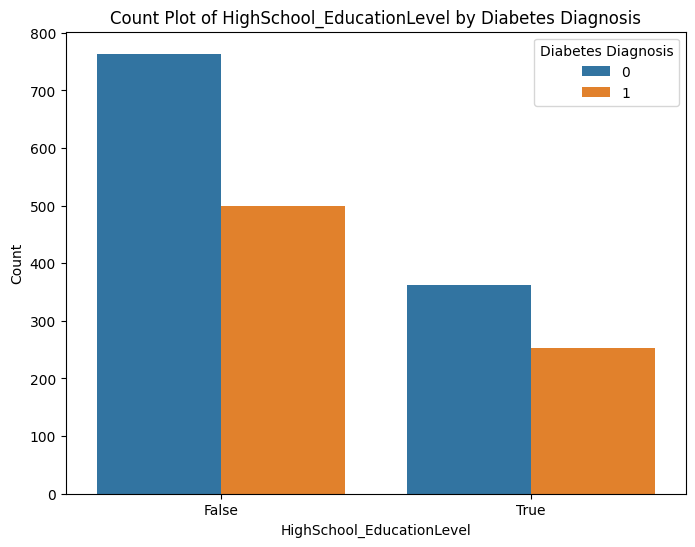

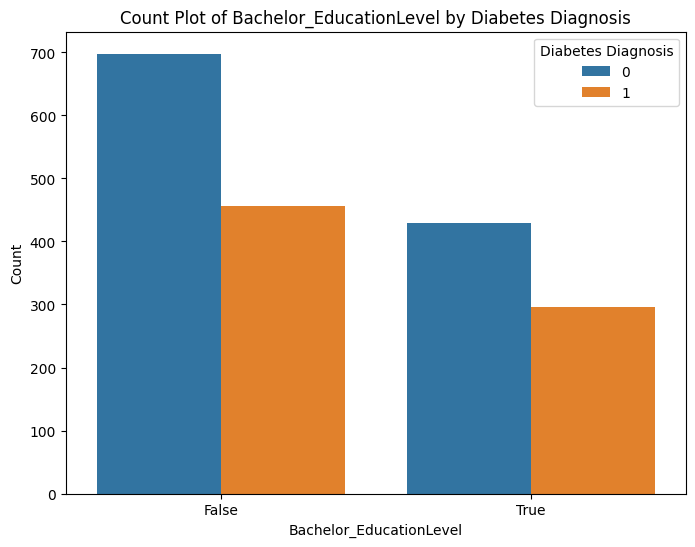

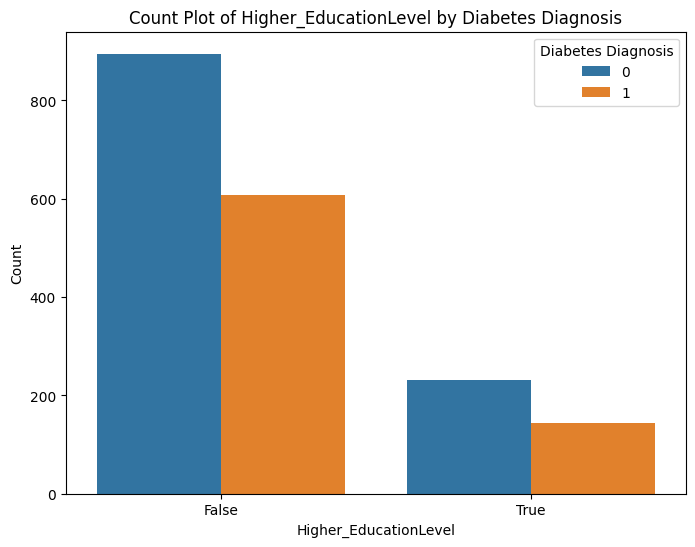

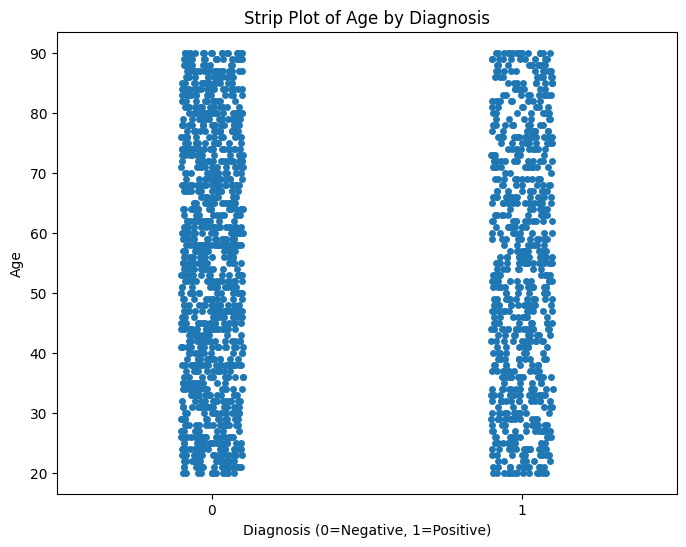

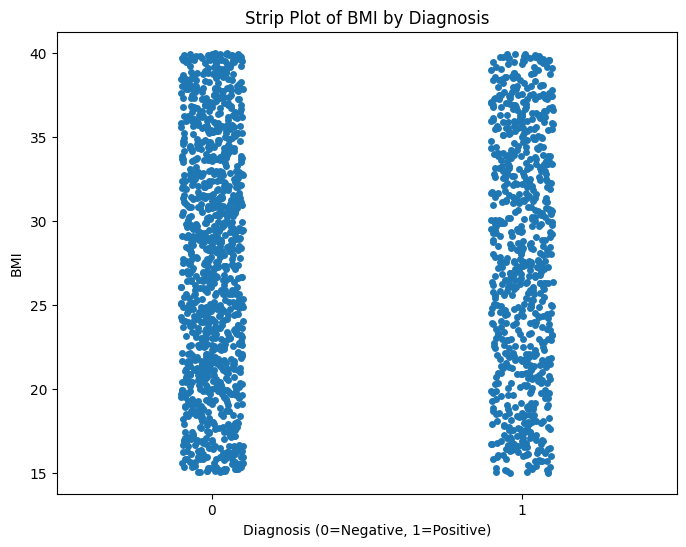

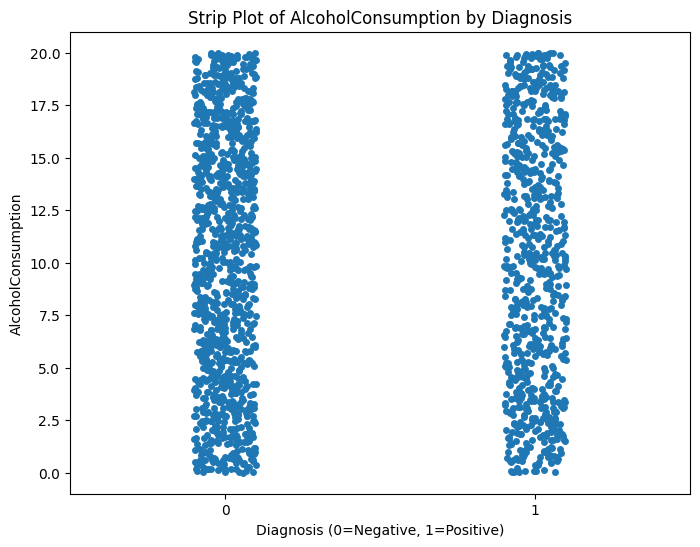

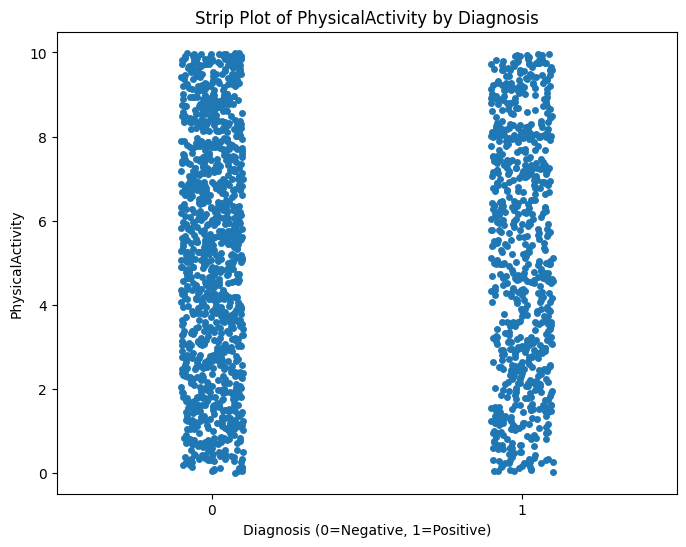

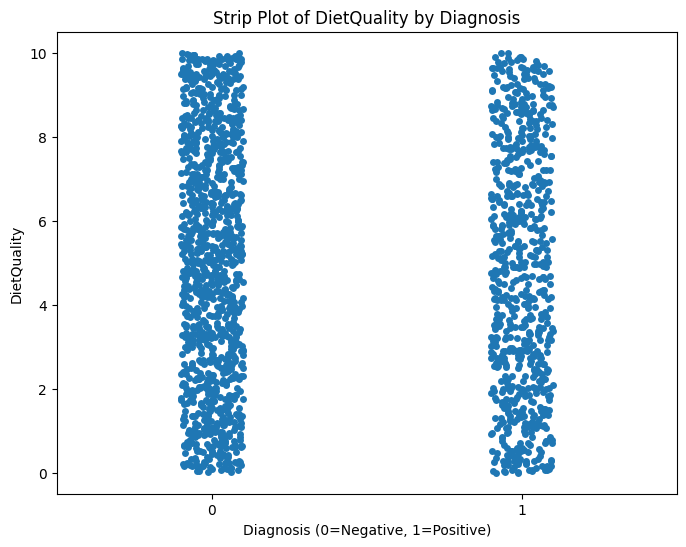

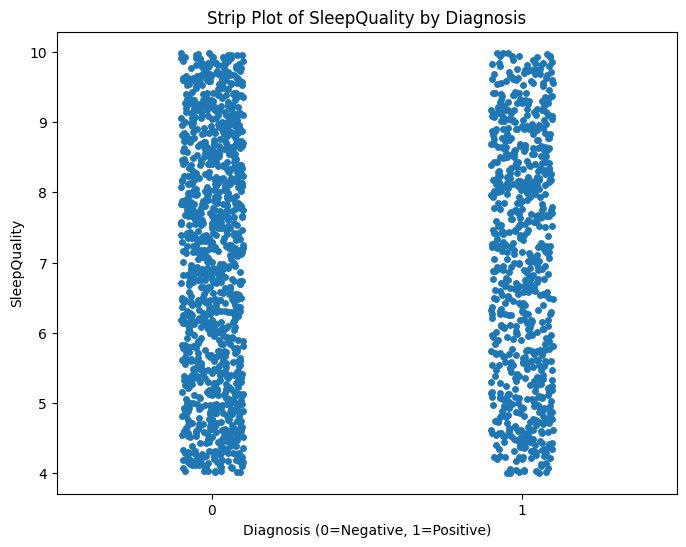

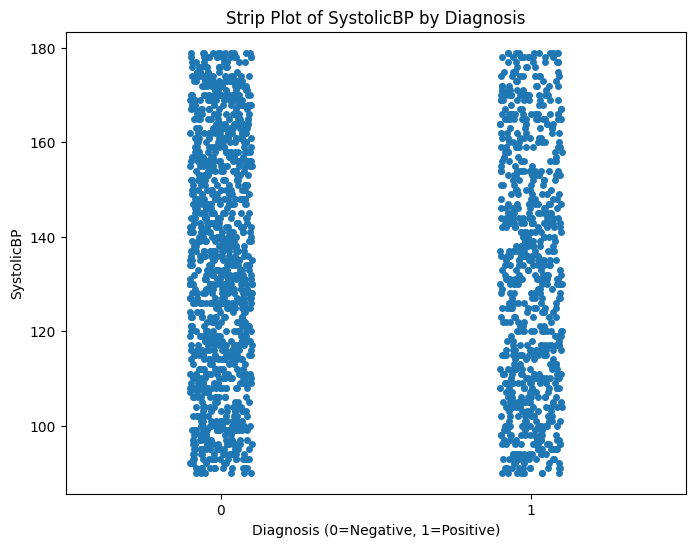

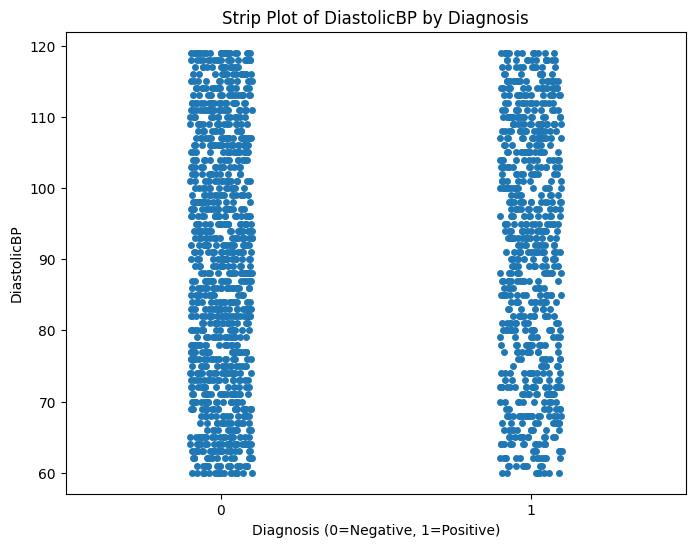

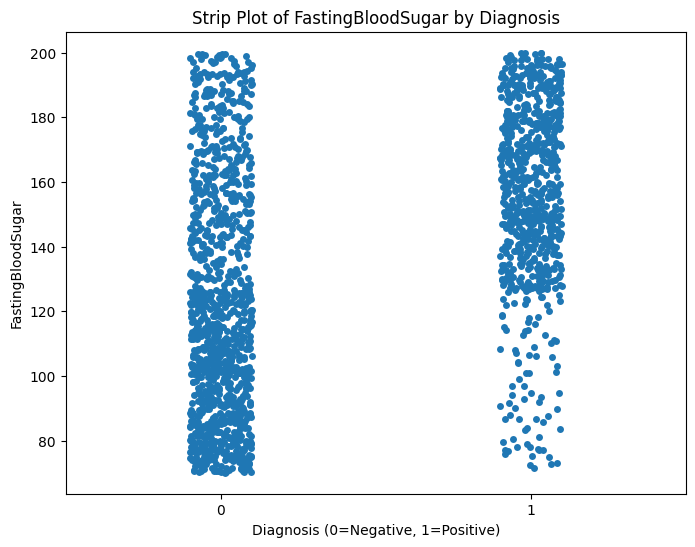

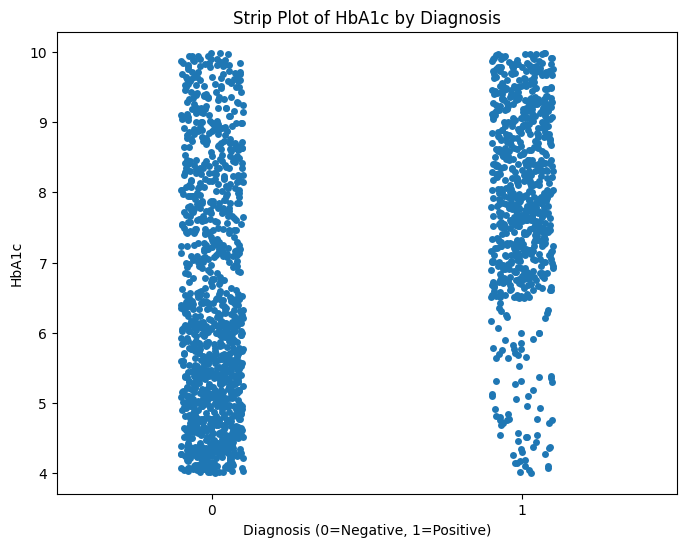

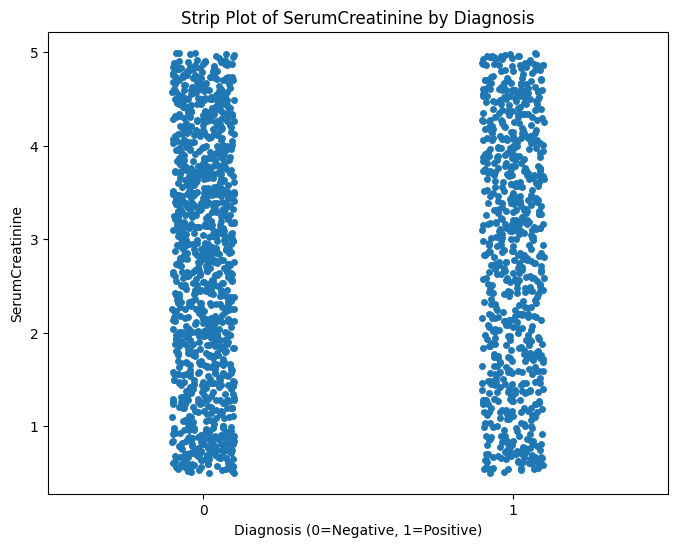

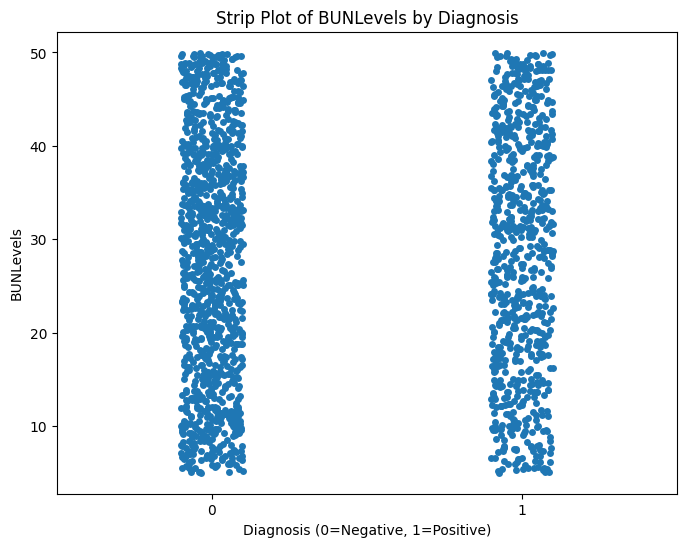

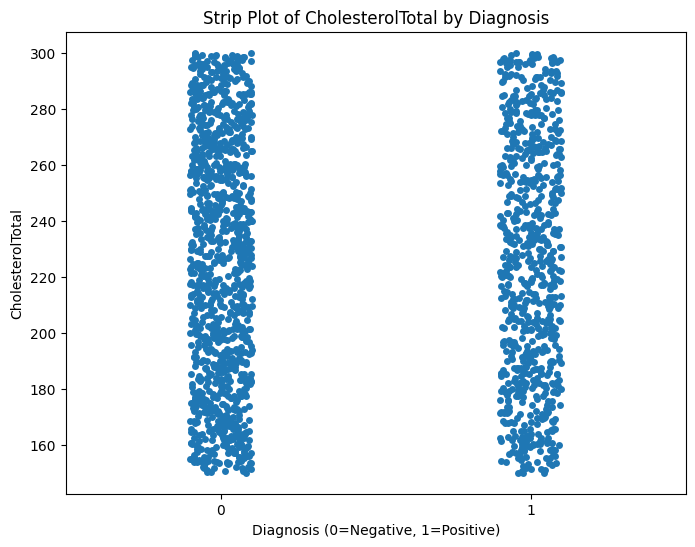

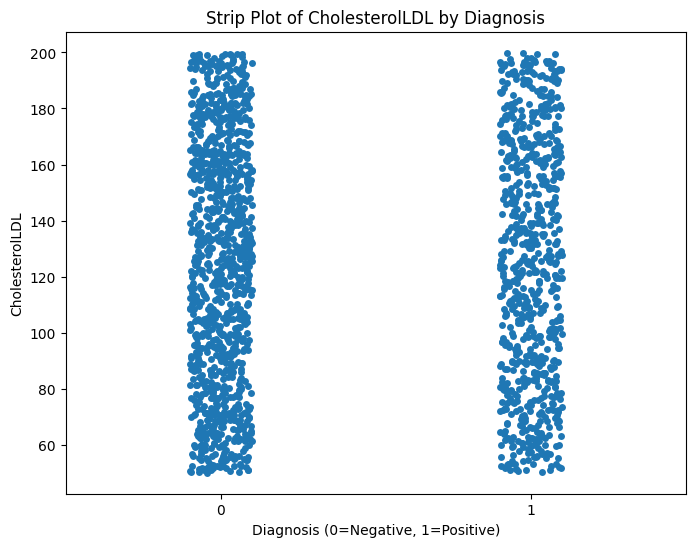

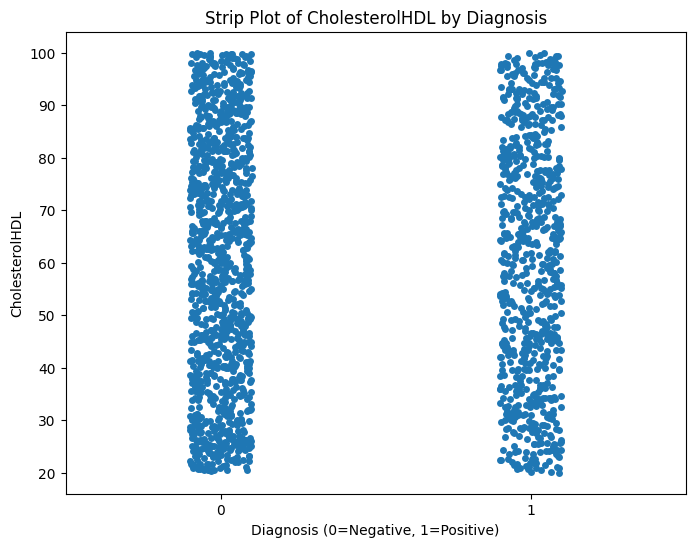

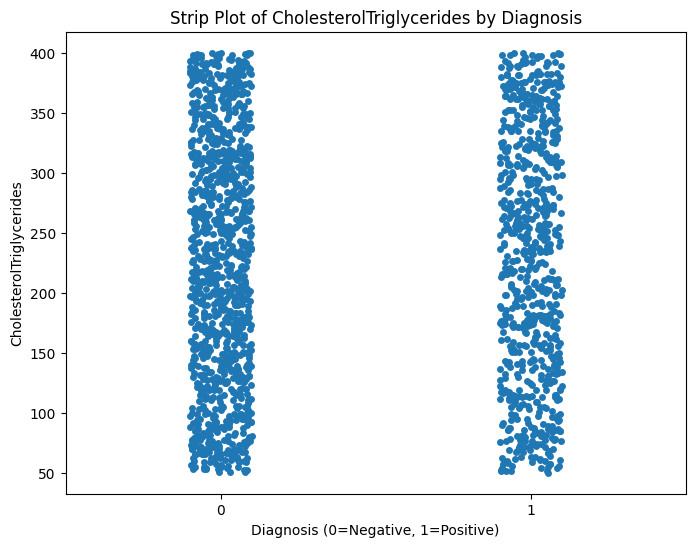

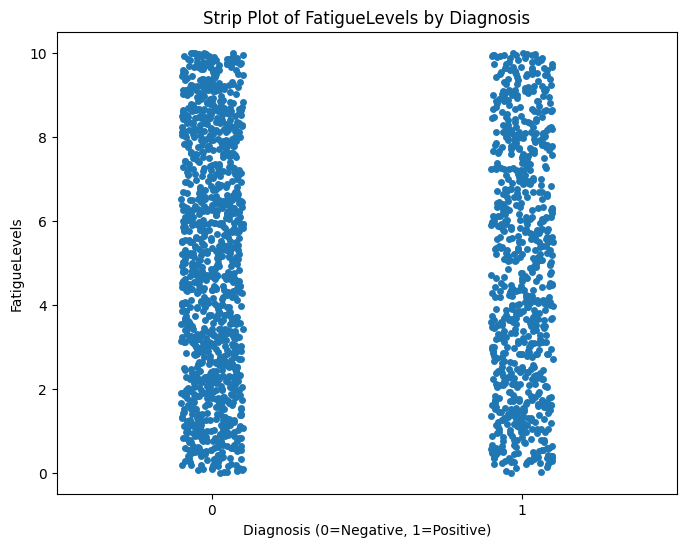

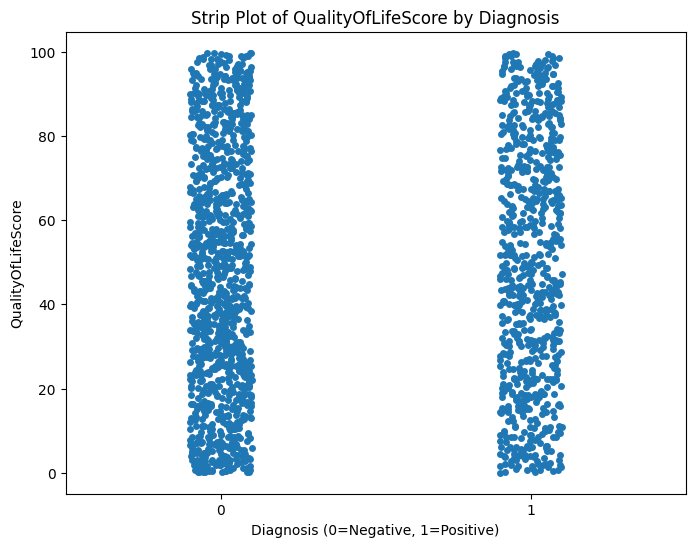

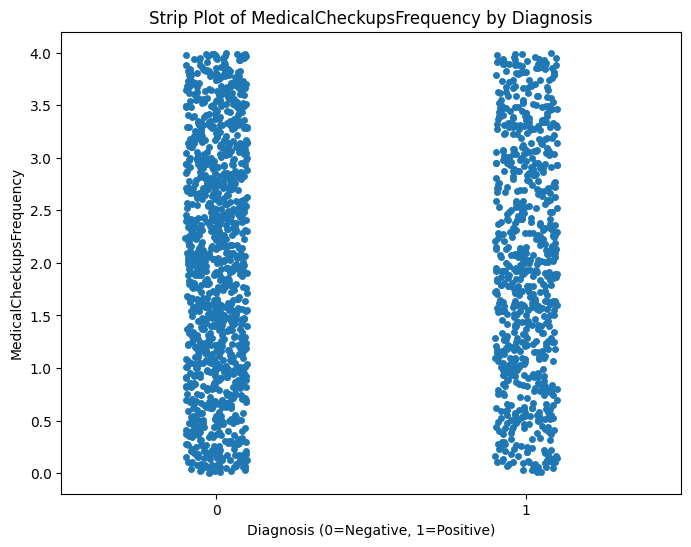

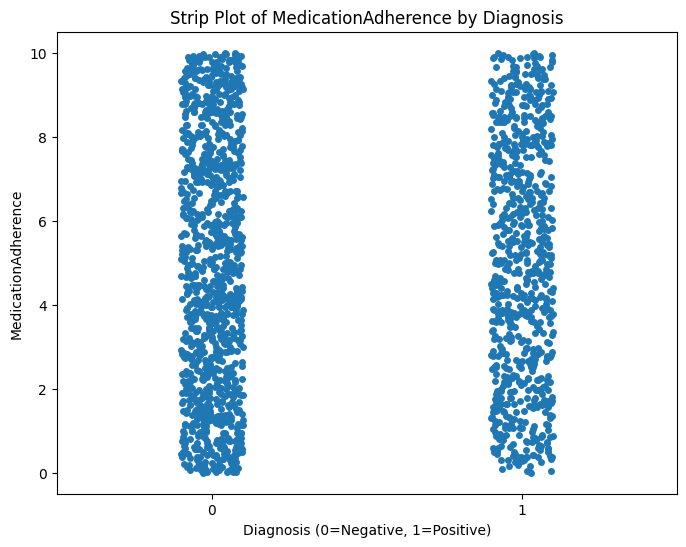

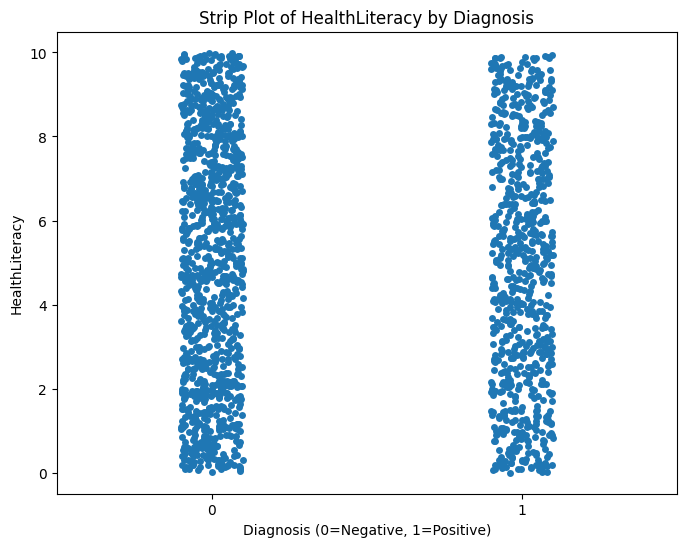

                          Feature  Importance
16                          HbA1c    0.386790
15              FastingBloodSugar    0.295748
12                   Hypertension    0.044981
26                ExcessiveThirst    0.039840
25              FrequentUrination    0.030354
27          UnexplainedWeightLoss    0.024277
5                PhysicalActivity    0.022175
32             QualityOfLifeScore    0.016156
36       MedicalCheckupsFrequency    0.015808
18                      BUNLevels    0.013615
2                             BMI    0.012236
14                    DiastolicBP    0.011025
28                  FatigueLevels    0.009204
17                SerumCreatinine    0.009040
22       CholesterolTriglycerides    0.008530
4              AlcoholConsumption    0.007322
0                             Age    0.006929
21                 CholesterolHDL    0.006923
6                     DietQuality    0.005939
38                 HealthLiteracy    0.005654
13                     SystolicBP 

In [10]:
import math

# first, I want to see what columns are missing values

# this outputs false, meaning there are no missing values in the entire dataset!
print(df.isna().any().any())
# with this in mind, there is no need to address missingness!

print(df.dtypes)

# getting rid of columns I am not planning on using from the very begining
df = df.drop(columns=['PatientID', 'DoctorInCharge', 'AntidiabeticMedications', 'Ethnicity'])
# next I want to see what unique values are present in each column
# I'm doing this to see which features are categorical versus which are numeric
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")
# From the results I got, besides seeing which features are categorical versus numeric,
# I also see that sociecenomic status and education level should be one-hot encoded. I will do this after
# checking for outlier values. To do this, I want to see how many times each value
# occurs for columns where there are a limited number of unique values.
exclude_column = ['Low_SocioeconomicStatus', 'Mid_SocioeconomicStatus', 'High_SocioeconomicStatus', 'None_EducationLevel', 'HighSchool_EducationLevel', 'Bachelor_EducationLevel', 'Higher_EducationLevel']
categorical_columns = ['Gender',
                       'SocioeconomicStatus', 'EducationLevel',
                       'Smoking', 'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension', 'AntihypertensiveMedications', 'Statins', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'Diagnosis']

categorical_columns2 = ['Gender',
                       'Smoking', 'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension', 'AntihypertensiveMedications', 'Statins', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'Diagnosis']
all_columns = df.columns.tolist()
non_categorical_columns = [col for col in all_columns if col not in categorical_columns and col not in exclude_column]

for column in categorical_columns2:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

# I'm now going to see if any of the categorical unique values occur less then five percent of the time in the data.
# This is going to be true if they do not occur at least 94 times.
# It seems that a 1 or yes for PolycysticOvarySyndrome, occurs only 84 times, meaning it only occurs about 4.5% of the
# time. With this in mind, I considered upsampling the data based on PolycysticOvarySyndrome. However, I ultimetely
# decided against doing so for several reasons. The first being that 4.5 is quite close to 5 as well as
# the risk of overemphisizing the minority class, in this case individuals with Polycysti Ovary Syndrome.

# With the categorical/binary columns, out of the way, I now want to
# check the non-cateogrical columns for outliers.

n_columns = len(non_categorical_columns)
n_rows = math.ceil(n_columns / 3)  # For a 3-column layout
plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(non_categorical_columns):
    plt.subplot(n_rows, 3, i + 1)  # Adjust rows and columns as needed
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# Based on how my plots look, there are no outliers in the non-categorical columns
# as well!

# Now, I am going to one-hot encode SocioeconomicStatus and EducationLevel.
# For reference, SocioeconomicStatus is 0: Low, 1: Middle, 2: High
# Education Level is 0: None, 1: High School, 2: Bachelor's, 3: Higher
#df = pd.get_dummies(df, columns=['SocioeconomicStatus', 'EducationLevel'])

df.head(10)
# Our next step is going to be to rename columns so that they are easily understandable.
# For the most part they already are, this is mostly just renaming the new
# columns created by one-hot encoding
df = df.rename(columns={'SocioeconomicStatus_0': 'Low_SocioeconomicStatus','SocioeconomicStatus_1': 'Mid_SocioeconomicStatus','SocioeconomicStatus_2': 'High_SocioeconomicStatus', 'EducationLevel_0': 'None_EducationLevel','EducationLevel_1': 'HighSchool_EducationLevel','EducationLevel_2': 'Bachelor_EducationLevel','EducationLevel_3': 'Higher_EducationLevel'})
df.head(10)

# I am also going to now add the one-hot encoded columns to a new list that includes the list
# from earlier
new_cat_columns = categorical_columns2 + ['Low_SocioeconomicStatus', 'Mid_SocioeconomicStatus', 'High_SocioeconomicStatus', 'None_EducationLevel', 'HighSchool_EducationLevel', 'Bachelor_EducationLevel', 'Higher_EducationLevel']

# Now that all that has been done, I want to look over all my columns
# using the describe() method to see if there's anything I have missed about them!
print(df.describe(include='all'))

# Now, I want to begin to consider which of these features I am going to use
# in my machine learning model. I am going to look at graphs that visually
# show the relationtionship between features and my label.

for feature in new_cat_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Diagnosis', data=df)
    plt.title(f'Count Plot of {feature} by Diabetes Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Diabetes Diagnosis')
    plt.show()
# Here, I am on the lookout for any features that have a very different
# distribution of diabetes diagnosis based on category.
# The exact numbers do not matter here, its their proportionality to
# each other.
# Visually, it looks like me like smokers tend to be diagnosed with
# diabetes more often then non-smokers, people with a family history of diabetes
# tend to be diagnosed with diabetes more often then people without one, people
# with gestational diabetes tend to be diagnoised with diabetes more often then people
# without, people with polycystic ovary syndrome tend to be diagnoised with
# diabetes more often then people without, people with hypertension tend to be
# diagnoised with diabetes more often then people without. FrquentUritation
# ExcessiveThirst, UnexplainedWeightLoss, BlurredVision, SlowHealingSores,
# TinglingHandsFeet, HeavyMetalsExposure, OccupationalExposureChemicals,
# WaterQuality seem to all be even more powerful feature.

# It does not seem like there is a large visual difference based on gender,
# previousprediabetes, and statins. I found previousprediabetes to be
# surprising, as I would expect that having it would correlate strongly
# with having diabetes.

# In addition, it seems as thoughhiaving a highschool education level
# correlates with being diagnosed with diabetes.

# I did not find this to be espetially helpful in eliminating,
# features as most features seemed to be at least somewhat correlated to
# diabetes diagnosis status. I do think I am going to not use statins, but I
# am curious about gender and previousdiabetes impacts, so I am going to,
# after examining my numeric variables, train a simple decision tree to be able
# to see what the most important features in it are.

for feature in non_categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.stripplot(x='Diagnosis', y=feature, data=df)
    plt.title(f'Strip Plot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis (0=Negative, 1=Positive)')
    plt.ylabel(feature)
    plt.show()

# Here, some of the espetially important features seem to be:
# FastingBloodSugar, HbA1c and SeruCreatinine.
# It didn't seem to me as though there was a huge correlation between
# diabetes diagnosis and any of the other non-categorical columns
# as based on looking at the strip plots.

# Now, training a tree model model and seeing what the most
# influencial features are:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sorted_features = sorted_feature_importance_df['Feature'].tolist()
print(sorted_feature_importance_df)

# In terms of these results, they are mostly consistant with what I had been expecting
# based on analyzing my graphs, although the way in which many
# features have an importance of 0 is very surprising to me,
# particularly that a feature such if hands and feet are tingling or not
# would have such an importance.

# Despite MedicalCheckupsFrequency importance in the decision tree,
# I think I am going to exclude it
# because I could see it being a case of people who have diabetes going to the
# doctor more often to manage it. With that in mind, I think that it should
# be excluded for the purposes of this being a predictive model.
# Based on looking at feature importance for this decision tree model
# as well as at the graphs, I think that I can narrow down my model to using the
# following twenty features:
# HbA1c, FastingBloodSugar, SeruCreatinine, Hypertension, ExcessiveThirst,
# FrequentUrination, UnexplainedWeightLoss, QualityOfLifeScore, BUNLevels,
# PhysicalActivity, Smoking, FamilyHistoryDiabetes, GestationalDiabetes,
# PolycysticOvarySyndrome, BlurredVision, SlowHealingSores,
# TinglingHandsFeet, DietQuality, BMI and HeavyMetalsExposure.

# Choosing this combination of features comes from a few sources.
# These are what the graphs seem to imply about these features being
# heavily correlated with the Diagnosis label, the results of
# which features are weighted as most important in the decision tree
# I trained up above as well as previous domain about diabetes from
# first hand experience and research.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.

My feature list currently is: HbA1c, FastingBloodSugar, SeruCreatinine, Hypertension, ExcessiveThirst,
FrequentUrination, UnexplainedWeightLoss, QualityOfLifeScore, BUNLevels,
PhysicalActivity, Smoking, FamilyHistoryDiabetes, GestationalDiabetes,
PolycysticOvarySyndrome, BlurredVision, SlowHealingSores,
TinglingHandsFeet, DietQuality, BMI and HeavyMetalsExposure.

I chose to get rid of features using a combination of methods, which can be seen above. The main ways I decided which features to keep were by looking at graphs of the features graphed against our diagnosis label, along with looking at which features were deemed most important when a basic decision tree was trained, and through having domain specific knowledge of diabetes.

In terms of my model, I want to build a decision tree, and see how it performs when optimized. I also want to build a random forest of decision trees, and see how much higher the accuracy is when using random forest, which is the ensemble version of the decision tree. For training my models, I am planning on splitting my data in a 80/20 training split and then training, optimizing the combination of hyperparameters used through empirical methods, by testing various combinations and finding the best one. I am going to do the same for finding the best hyperparameters empirically.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan.

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [17]:
# Here, I fit my model and then evalute it.
# It has both an accuracy and a AUC of .88, which is
# quite good but not so high that I am very concerned about
# overfitting.
feature_list = ['HbA1c', 'FastingBloodSugar', 'SerumCreatinine', 'Hypertension', 'ExcessiveThirst', 'FrequentUrination', 'UnexplainedWeightLoss', 'QualityOfLifeScore', 'BUNLevels', 'PhysicalActivity', 'Smoking', 'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome', 'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet', 'DietQuality', 'BMI', 'HeavyMetalsExposure']
X = df[feature_list]
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# Next, I am going to train my model on a variety of hyperparameters and
# pick the model with the best combination (meaning the model with the
# highest accuracy and AUC)

Accuracy: 0.88
AUC: 0.88


In [25]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 3, 6, 19]
    }

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy for the best model on Test Data: {accuracy:.2f}")
# Here, we have an accuracy of .92, which is .04 more then the Decision Tree
# trained on the default hyperparameters.

# Next I am going to train a random forest classifier! I am going to
# also use a parameter grid and the GridSearchCV to optimize the model!

Best hyperparameters: {'max_depth': 5, 'max_features': 19, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy for the best model on Test Data: 0.92


In [26]:
# I was unable to run this code as my run time
# env right disconnecting (this code would take a long time
# to fully run), however it would return the best hyperparameters
# for a random forest of decision trees!
# I assume that the accuracy here would be
# even higher then .92.
param_grid = {
    'n_estimators': [10,20,30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 3, 6, 19]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
accuracy = best_rf.score(X_test, y_test)
print(f"Accuracy for best model on Test Data: {accuracy:.2f}")

KeyboardInterrupt: 